# <font color ='black'>Customer churn with Logistic Regression

<h2 id="Problem Statement">Problem Statement</h2>
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
# importing required libraries


#for DataFrame manipulation
import pandas as pd 

#for basic operations on array
import numpy as np 

#for data visualisations
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

#for missing values
import missingno as mno

# setting up the background style for plots
plt.style.use('fivethirtyeight') 

# for ignoring the errors
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
# Reading the dataset

df= pd.read_csv('D:/Datasets/Telco Customer Churn.csv')
df.head(100)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


# <font color = 'black'>Exploratory Data Analysis

In [3]:
# lets check the type of data

type(df)


pandas.core.frame.DataFrame

In [4]:
# lets also check the shape of the dataset

print(df.shape)


(7043, 21)


In [5]:
# lets check the column names in the dataset

df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# lets check the summary of dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# lets check the data types of columns

df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# lets describe the data for the numerical columns

df.describe().style.background_gradient(cmap='magma')


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# lets describe the data for the categorical columns

df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
#df.describe(include='object').columns

<AxesSubplot:>

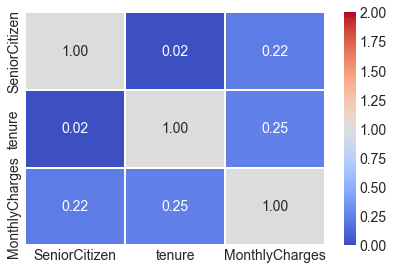

In [11]:
# lets check the correlation of data using heatmap

sns.heatmap(df.corr(),fmt='0.2f',vmin=0,vmax=2,linewidths=2,annot=True,cmap='coolwarm')


In [12]:
#lets check the unique values in column

df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
# checking the percentage unique

for col in df.columns :
    print('col_name:',col,'unique percentage :',len(df[col].unique())/len(df))

col_name: customerID unique percentage : 1.0
col_name: gender unique percentage : 0.0002839698991906858
col_name: SeniorCitizen unique percentage : 0.0002839698991906858
col_name: Partner unique percentage : 0.0002839698991906858
col_name: Dependents unique percentage : 0.0002839698991906858
col_name: tenure unique percentage : 0.010364901320460031
col_name: PhoneService unique percentage : 0.0002839698991906858
col_name: MultipleLines unique percentage : 0.0004259548487860287
col_name: InternetService unique percentage : 0.0004259548487860287
col_name: OnlineSecurity unique percentage : 0.0004259548487860287
col_name: OnlineBackup unique percentage : 0.0004259548487860287
col_name: DeviceProtection unique percentage : 0.0004259548487860287
col_name: TechSupport unique percentage : 0.0004259548487860287
col_name: StreamingTV unique percentage : 0.0004259548487860287
col_name: StreamingMovies unique percentage : 0.0004259548487860287
col_name: Contract unique percentage : 0.000425954848

<AxesSubplot:>

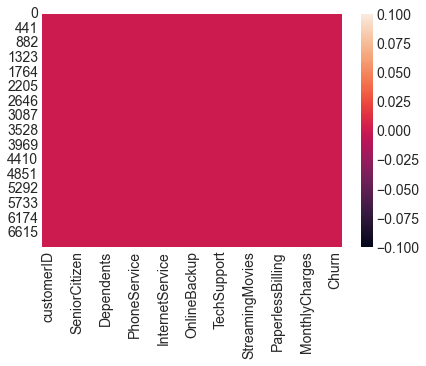

In [14]:
# lets check the null values in data frame

#df.isna().sum()

sns.heatmap(df.isna())


# <font color = 'black'>Feature Engineering

In [15]:
# changing the improper data type of a feature to proper

#df['TotalCharges'].astype(float)

df['TotalCharges']=pd.to_numeric(df['TotalCharges']=='int64')

print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges           bool
Churn                object
dtype: object


# <font color ='Black'>Coverting Categorical to Numerical

In [16]:
# Label Encode the Objective Datatypes

from sklearn.preprocessing import OneHotEncoder

onehotencoder= OneHotEncoder()


In [17]:
df['gender'] = onehotencoder.fit_transform(df['gender'].values.reshape(-1,1)).toarray()
df['Partner'] = onehotencoder.fit_transform(df['Partner'].values.reshape(-1,1)).toarray()
df['Dependents'] = onehotencoder.fit_transform(df['Dependents'].values.reshape(-1,1)).toarray()
df['PhoneService'] = onehotencoder.fit_transform(df['PhoneService'].values.reshape(-1,1)).toarray()
df['MultipleLines'] = onehotencoder.fit_transform(df['MultipleLines'].values.reshape(-1,1)).toarray()
df['InternetService'] = onehotencoder.fit_transform(df['InternetService'].values.reshape(-1,1)).toarray()
df['OnlineSecurity'] = onehotencoder.fit_transform(df['OnlineSecurity'].values.reshape(-1,1)).toarray()
df['OnlineBackup'] = onehotencoder.fit_transform(df['OnlineBackup'].values.reshape(-1,1)).toarray()
df['DeviceProtection'] = onehotencoder.fit_transform(df['DeviceProtection'].values.reshape(-1,1)).toarray()
df['TechSupport'] = onehotencoder.fit_transform(df['TechSupport'].values.reshape(-1,1)).toarray()
df['StreamingTV'] = onehotencoder.fit_transform(df['StreamingTV'].values.reshape(-1,1)).toarray()
df['StreamingMovies'] = onehotencoder.fit_transform(df['StreamingMovies'].values.reshape(-1,1)).toarray()
df['Contract'] = onehotencoder.fit_transform(df['Contract'].values.reshape(-1,1)).toarray()
df['PaperlessBilling'] = onehotencoder.fit_transform(df['PaperlessBilling'].values.reshape(-1,1)).toarray()
df['PaymentMethod'] = onehotencoder.fit_transform(df['PaymentMethod'].values.reshape(-1,1)).toarray()
df['Churn'] = onehotencoder.fit_transform(df['Churn'].values.reshape(-1,1)).toarray()

In [18]:
# again check the column are drop/not

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1.0,0,0.0,1.0,1,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,29.85,False,1.0
1,5575-GNVDE,0.0,0,1.0,1.0,34,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,56.95,False,1.0
2,3668-QPYBK,0.0,0,1.0,1.0,2,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,53.85,False,0.0
3,7795-CFOCW,0.0,0,1.0,1.0,45,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,42.30,False,1.0
4,9237-HQITU,1.0,0,1.0,1.0,2,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,70.70,False,0.0


In [19]:
# lets drop the customerid column and TotalCharges

df1= df.drop(['customerID','TotalCharges','gender','SeniorCitizen','Partner','Dependents','DeviceProtection','StreamingTV','StreamingMovies','PaymentMethod'],axis=1)


<AxesSubplot:>

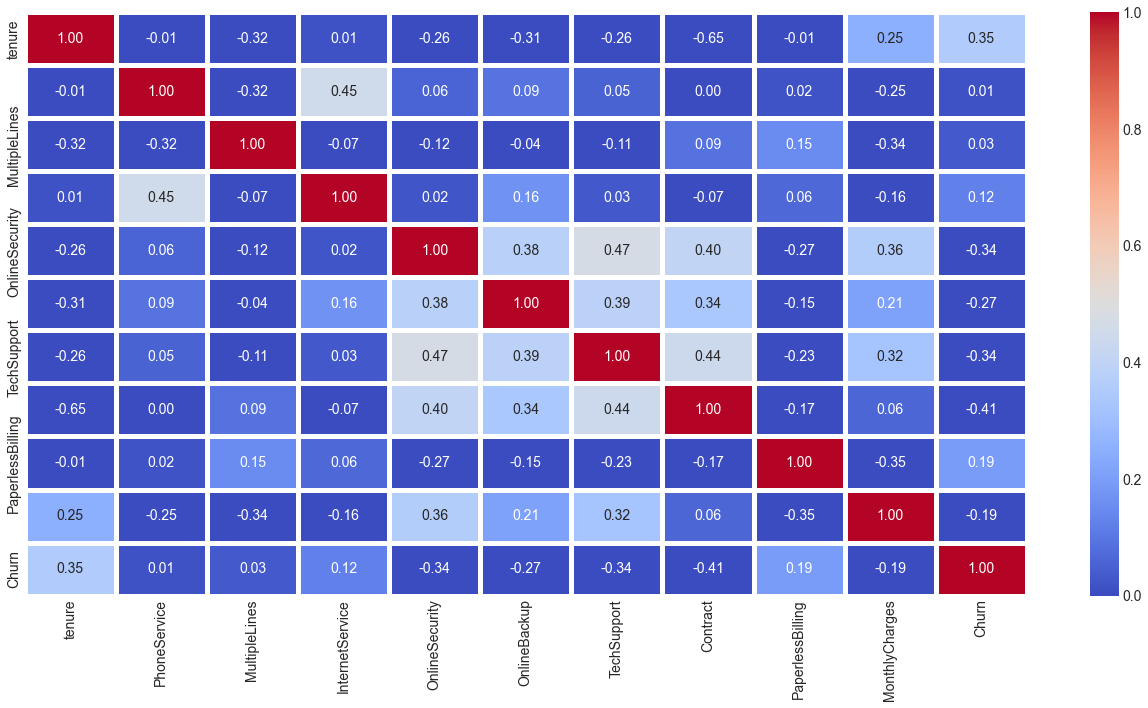

In [20]:
# again check the correlation of data using heatmap


plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),fmt='0.2f',xticklabels=1,yticklabels=2,vmin=0,vmax=1,linewidths=5,annot=True,cmap='coolwarm')


# <font color ='Black'>Splitting Features and Target Variables

In [21]:
X=df1.iloc[:,:-1]

In [22]:
X.shape

(7043, 10)

In [23]:
X.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,29.85
1,34,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,56.95
2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,53.85
3,45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,42.30
4,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,70.70


In [24]:
y=df.iloc[:,-1:]

In [25]:
y.shape

(7043, 1)

In [26]:
y.head()

,Churn
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


# <font color ='black'>Train test split

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


In [28]:

from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)


In [29]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 10) (5634, 1)
Test set: (1409, 10) (1409, 1)


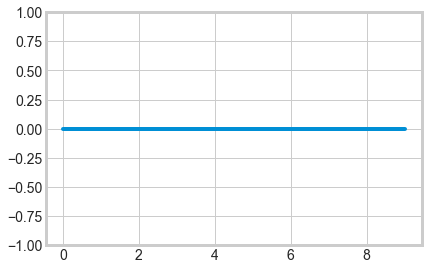

In [30]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means=[]
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means, scaley=False)

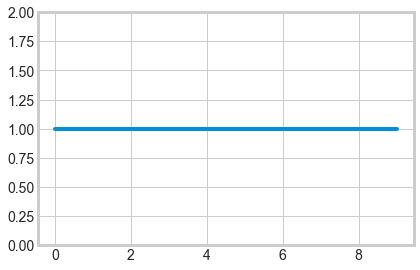

In [31]:
# check variance
plt.ylim(0,2)

vars=[]
for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))
plt.plot(vars)

# <font color ='black'>Model Building

In [32]:
# feature selection and model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model= LogisticRegression()
rfecv=RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(X_train,y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [33]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [34]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
selected_features=np.where(rfecv.support_)[0]
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

In [36]:
model.fit(X_test,y_test)

LogisticRegression()

In [37]:
# checking the train and test score 

print('Training_set_score:{:.2f}',format(model.score(X_train,y_train)))
print('Testing_set_score:{:.2f}',format(model.score(X_test,y_test)))


Training_set_score:{:.2f} 0.8054668086616968
Testing_set_score:{:.2f} 0.7835344215755855


In [38]:
pred_probs = model.predict_proba(X_test)

In [39]:
# get the probs of only churn=1

pred_probs = pred_probs[:,1]

In [40]:
model.score(X_test,y_test)

0.7835344215755855

In [41]:
y_pred=model.predict(X_test)

In [42]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

# <font color = 'black'>Metrics

# <font color ='black'>Confusion Matrix

In [43]:

from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score,classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))


[[917 118]
 [187 187]]


Confusion matrix, without normalization
[[917 118]
 [187 187]]


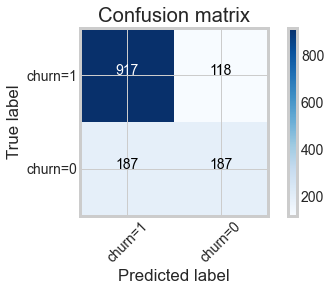

In [44]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


In [45]:
print(recall_score(y_test,y_pred))

0.8859903381642512


In [46]:
print(f1_score(y_test,y_pred))

0.8574100046750818


In [47]:
print(precision_score(y_test,y_pred))

0.8306159420289855


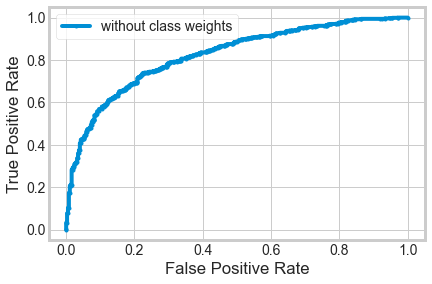

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Fpr, Tpr, _ = roc_curve(y_test, pred_probs)

plt.plot(Fpr, Tpr,marker='.',label='without class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

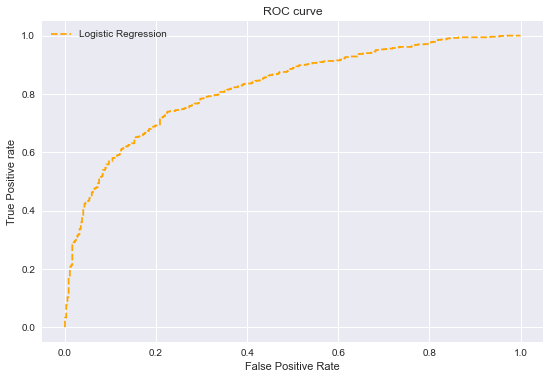

In [51]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(Fpr, Tpr, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [50]:
Auc = roc_auc_score(y_test,pred_probs)
print('Area Under Curve :',Auc)

Area Under Curve : 0.8230153194347568


# <font color ='black'>Classification Report

In [52]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.61      0.50      0.55       374
         1.0       0.83      0.89      0.86      1035

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



# <font color = 'black'>Cross Validation

In [ ]:
from sklearn.model_selection import KFold
model=LogisticRegression()
kfold_validation=KFold(n_splits=7)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

In [ ]:
print('mean score of k folds:',np.mean(results))

plt.plot(results)
plt.plot([np.mean(results)]*len(results))
plt.show()